**In this section we will just observe all the variables and see what treatment they need**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("raw_data/train.csv")

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.drop(columns='Id', inplace=True)
print(df.columns)

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [5]:
## list column with Nan
df_null = df.isnull().sum().sort_values(ascending = False).to_frame(name = "counts")
df_null[df_null.counts > 0]

,counts
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
FireplaceQu,690
LotFrontage,259
GarageYrBlt,81
GarageCond,81
GarageType,81
GarageFinish,81


In [6]:
var_nan = [var for var in df.columns if df[var].isnull().sum()>0]
print(var_nan)

['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


In [7]:
df_info = df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

### Let's See Target variable

**1.1 sales price**

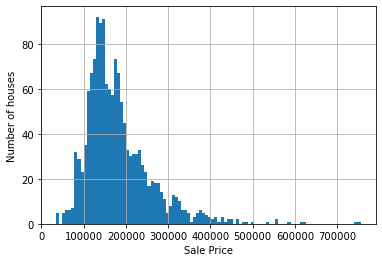

In [8]:
df.SalePrice.hist(bins = 100)
plt.ylabel('Number of houses')
plt.xlabel('Sale Price')
plt.show()

### 1.2 There are too many variables we will just segregate the variable by
* Categorical 
    * ordinal 
    * Nominal
* Numerical -
    * continuous 
    * discrete

In [9]:
### There are too many variables we will just segregate the variable by 
target = 'SalePrice'
# categorical variables
cat_vars = [var for var in df.columns if df[var].dtype == 'O']
# numeric variables
num_vars = [var for var in df.columns if var not in cat_vars and var != target]

# we will visualise categorical and numrical separatly
cat_vars_nan = [var for var in cat_vars if var in var_nan]
num_vars_nan = [var for var in num_vars if var in var_nan]


In [10]:
num_vars_nan

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

**1.3 Categorical variable Num categories**

<AxesSubplot:>

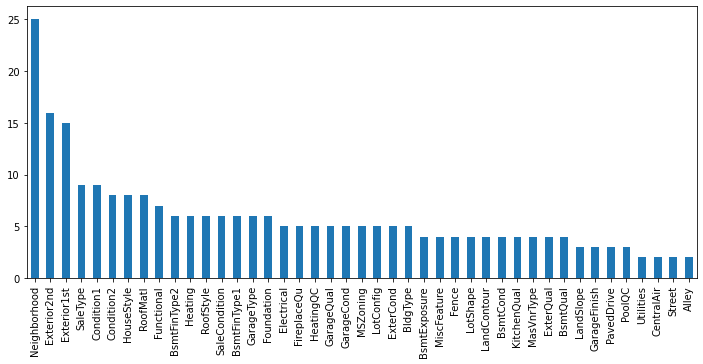

In [11]:
# we count unique categories with pandas unique() 
# and then plot them in descending order

df[cat_vars].nunique().sort_values(ascending=False).plot.bar(figsize=(12,5))

In [12]:
def analyse_cat(df, var):
    fig , axis =plt.subplots(1, 2, figsize=(15, 4))    
    df_mean  =  df.groupby(var, dropna=False)[target].mean().to_frame()
    df_count =  df[var].value_counts(normalize = True, dropna =False)
    #sns.countplot(x = var , data=df,  ax=axis[0] )
    df_mean.plot(kind = 'bar',  ax =axis[0] , title =var, ylabel = 'avg sales price')
    df_count.plot(kind = 'bar', ax =axis[1] , title = var, ylabel = 'percentage share')
    plt.show()

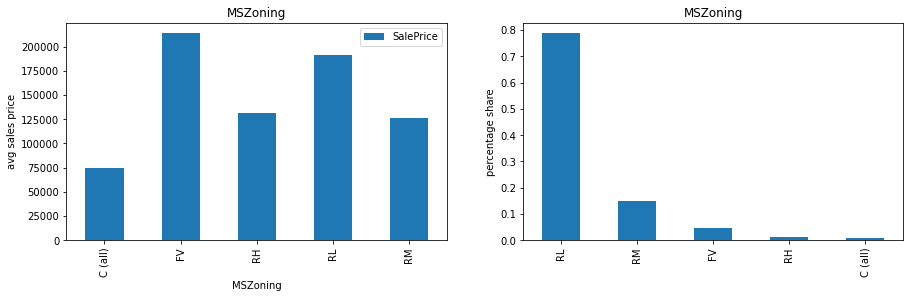

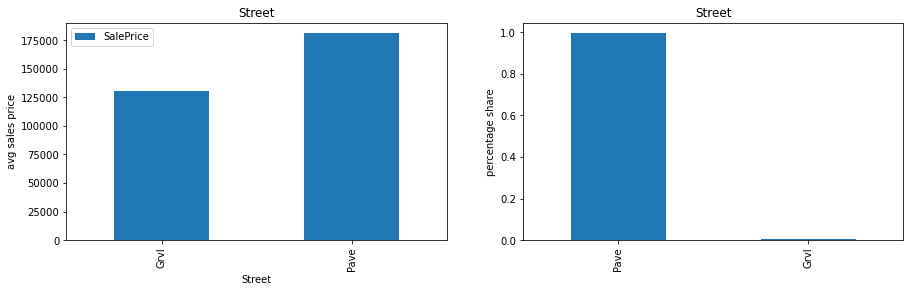

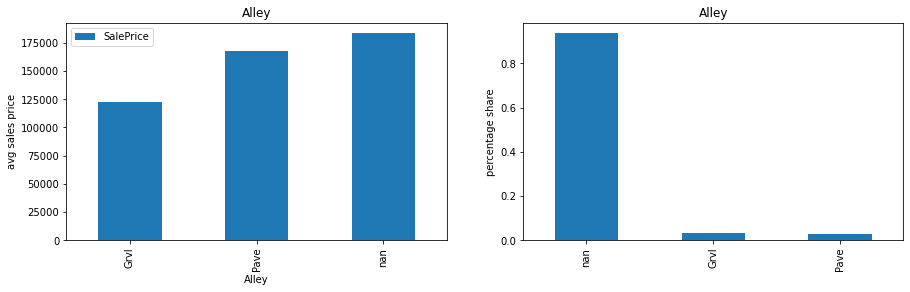

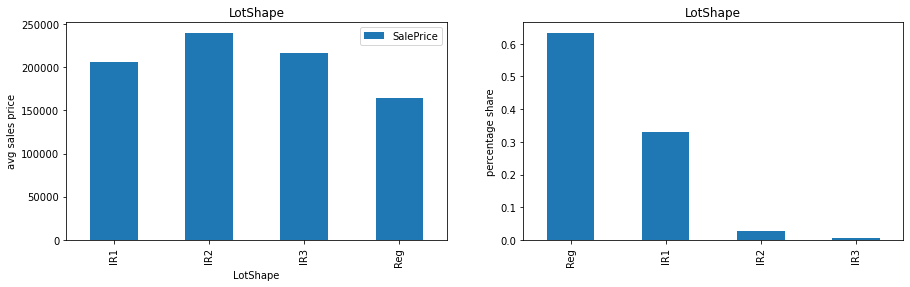

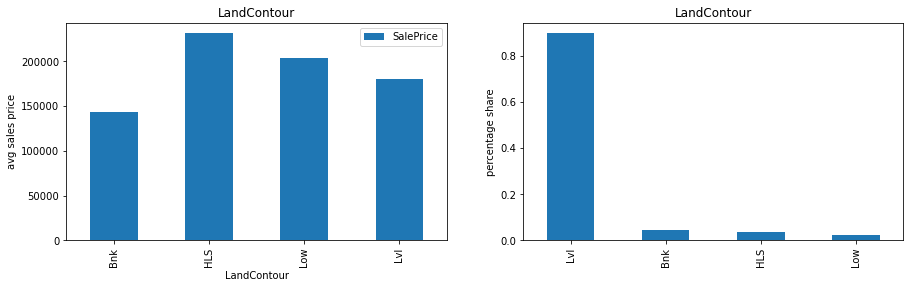

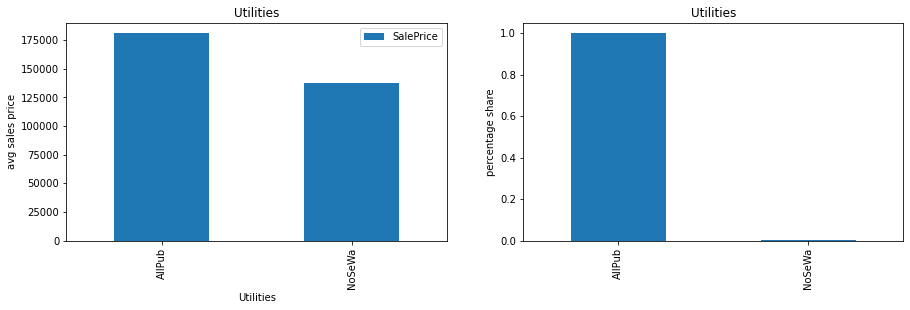

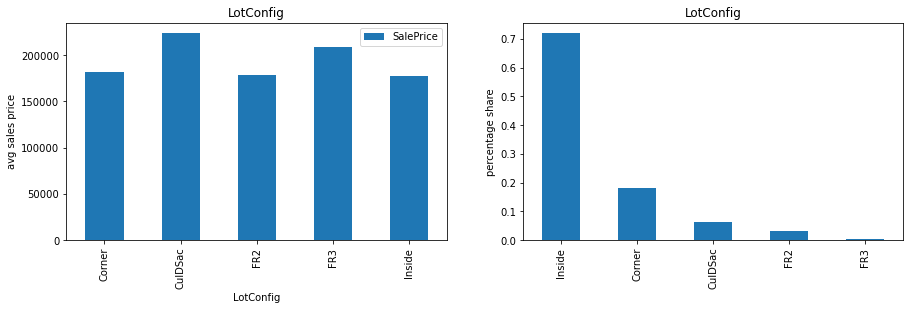

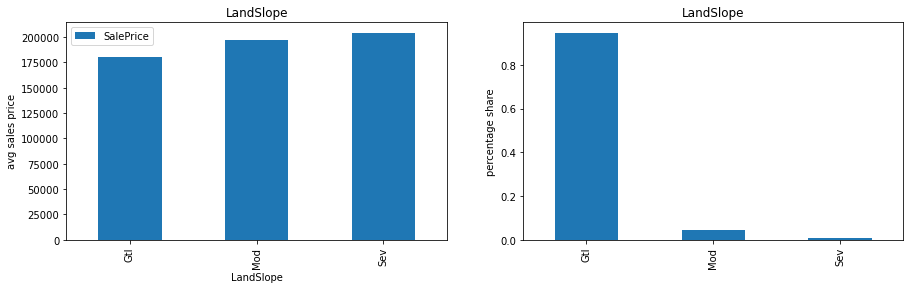

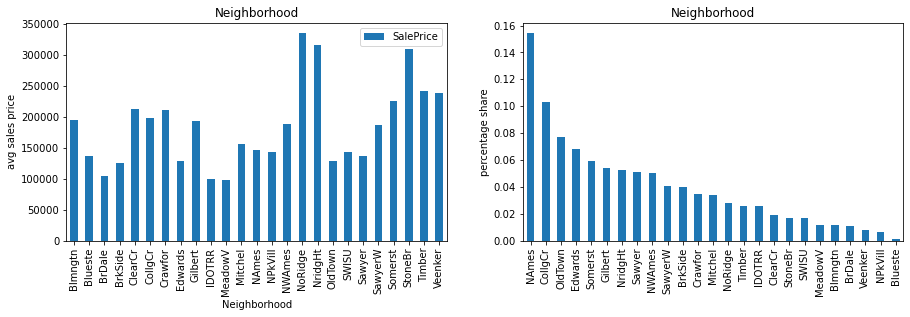

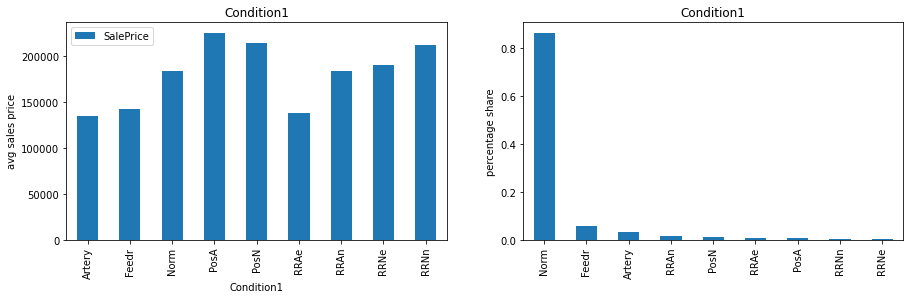

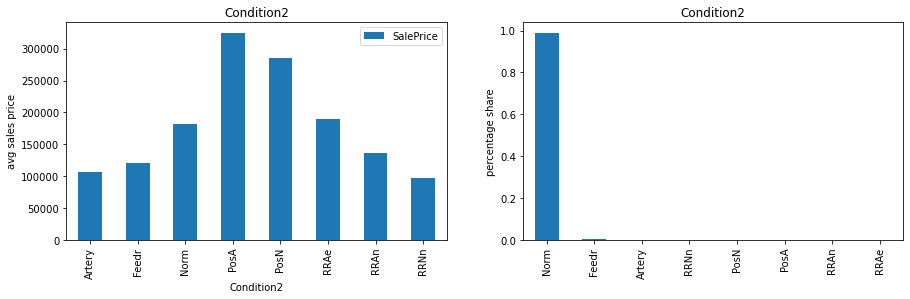

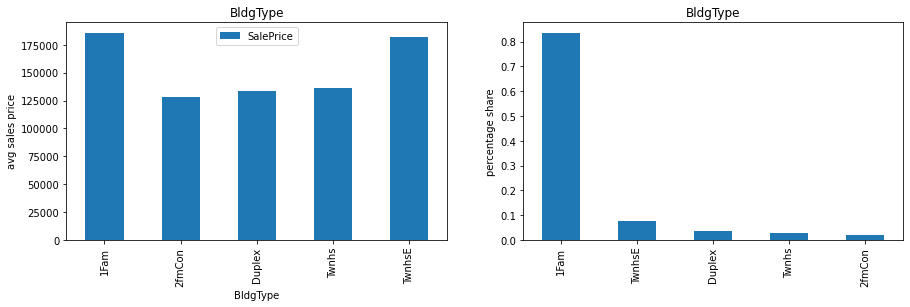

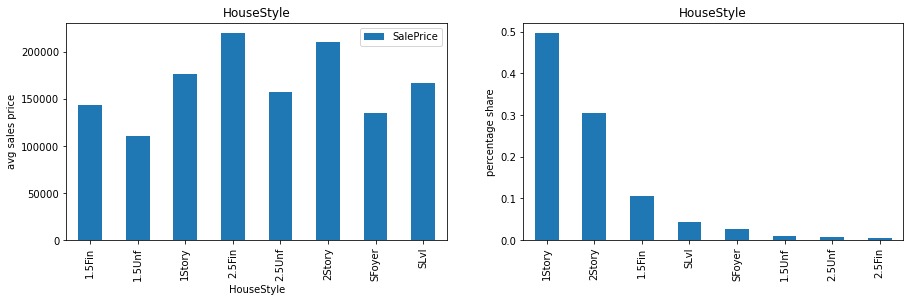

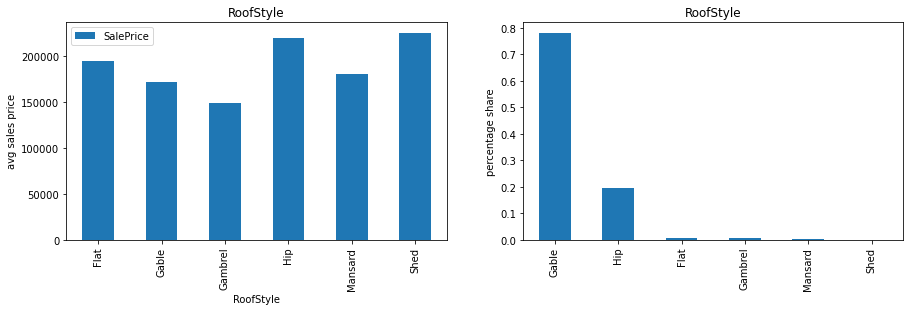

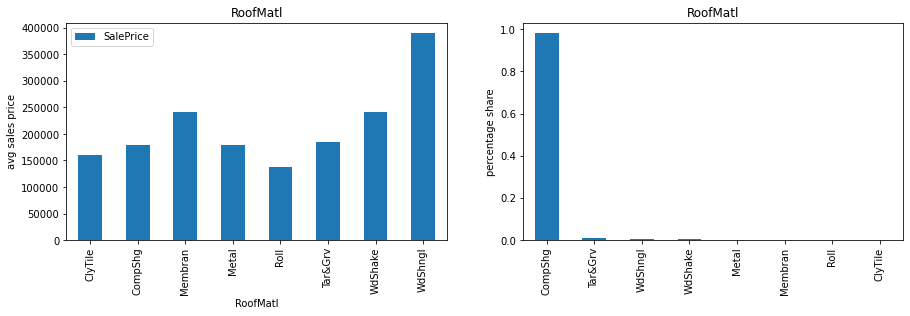

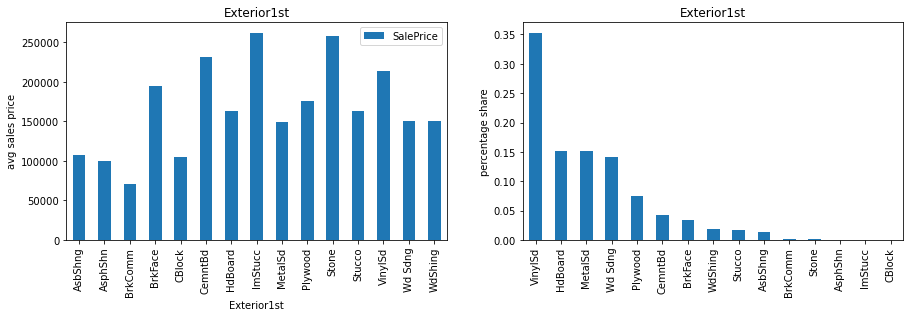

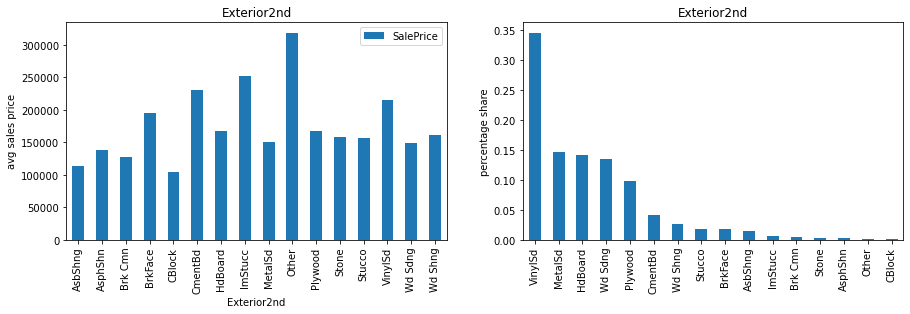

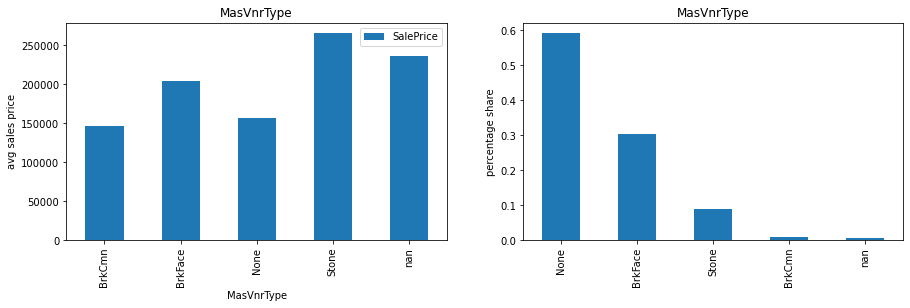

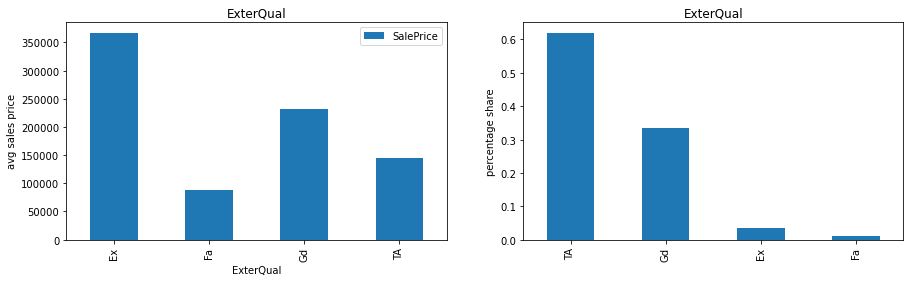

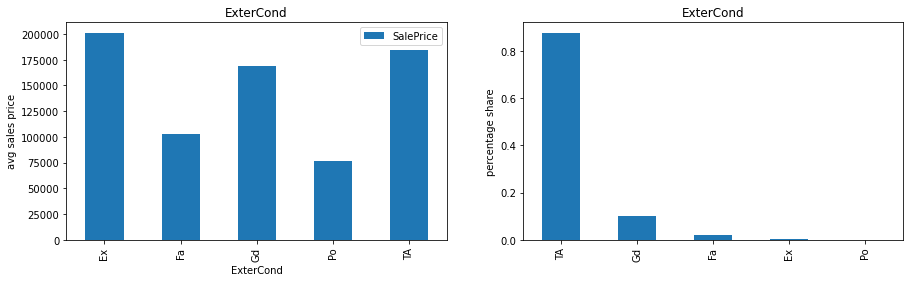

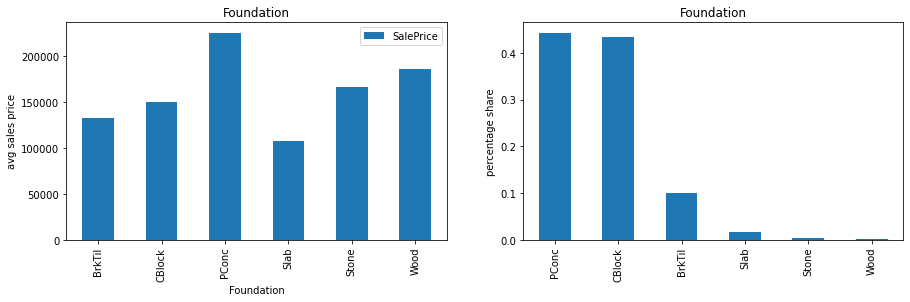

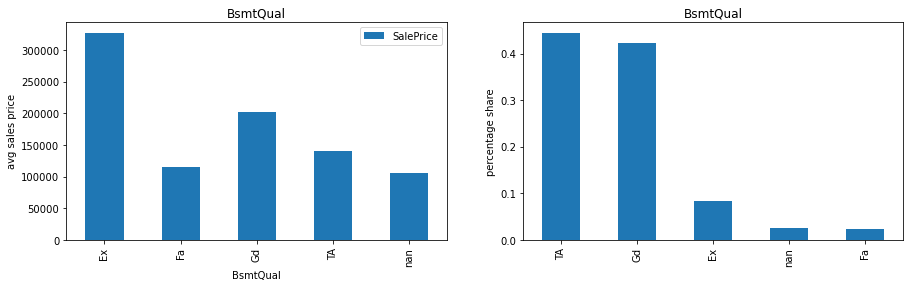

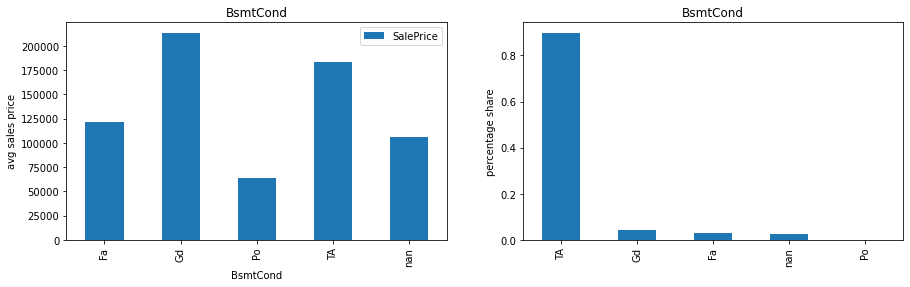

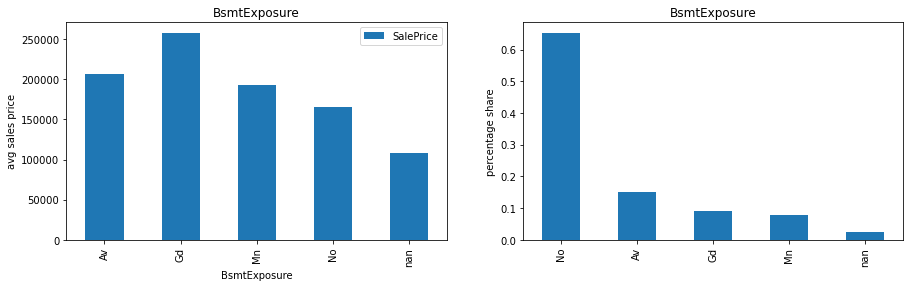

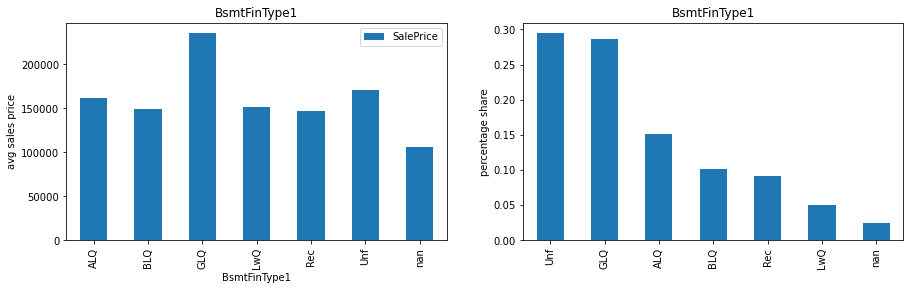

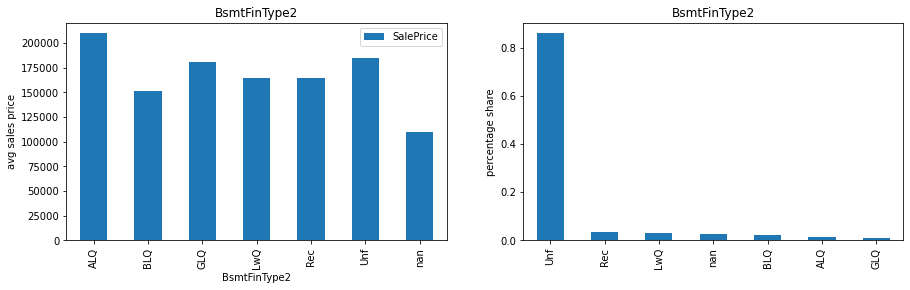

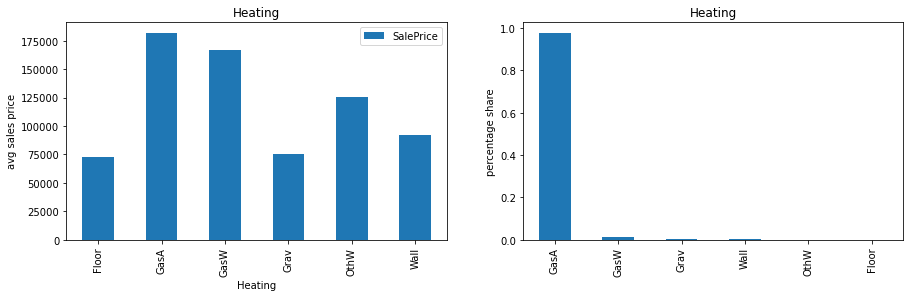

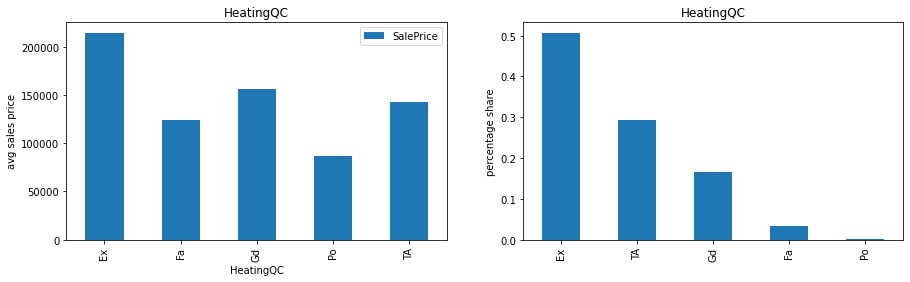

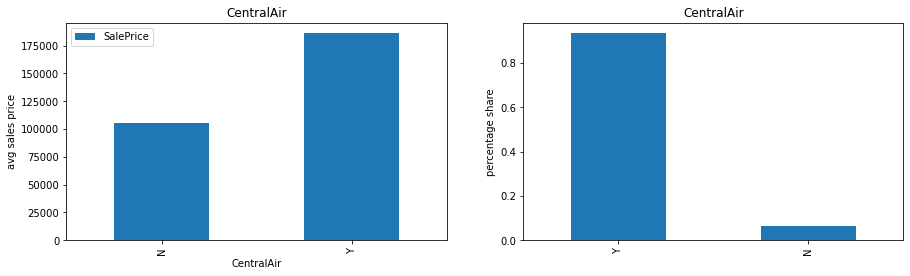

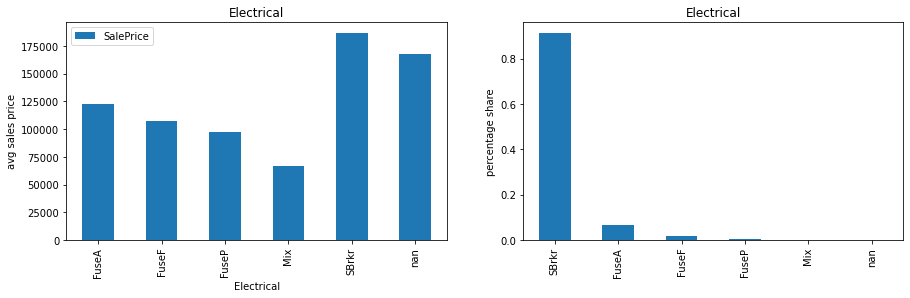

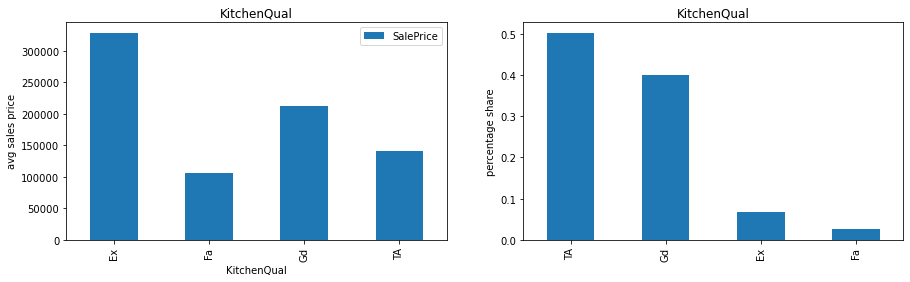

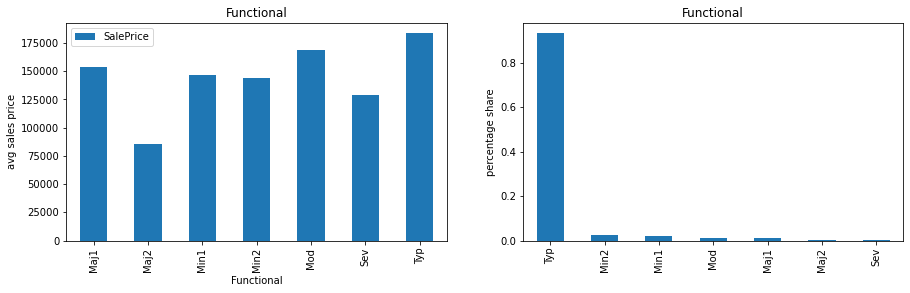

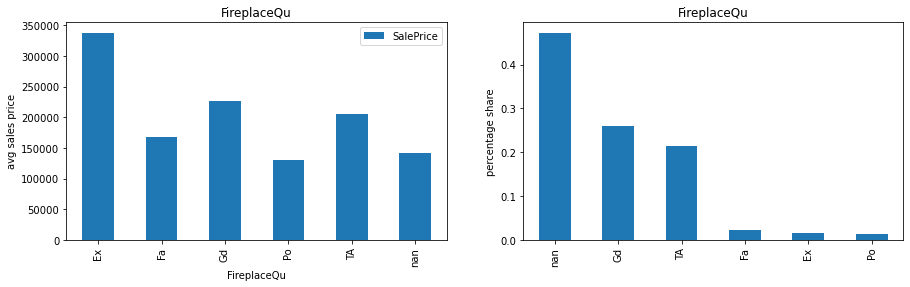

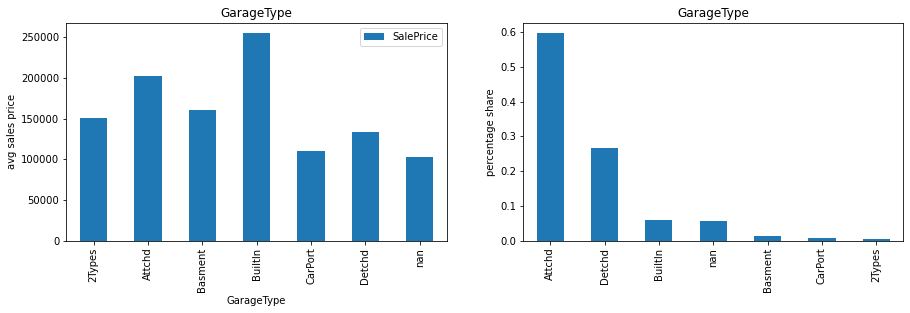

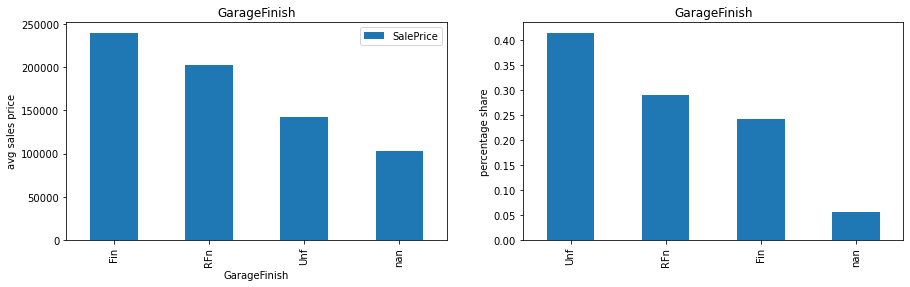

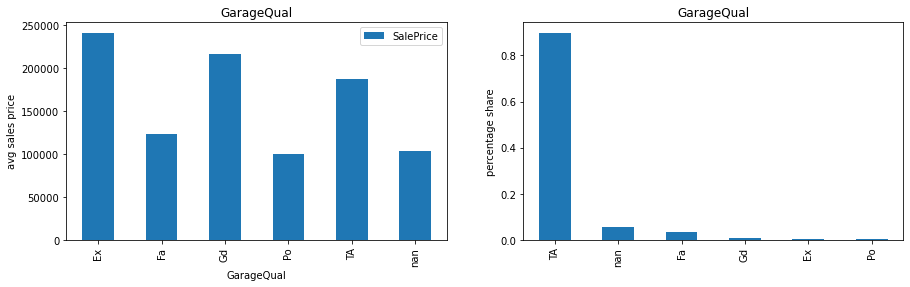

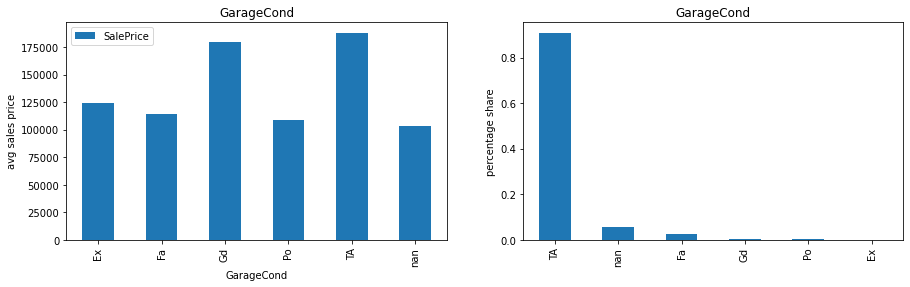

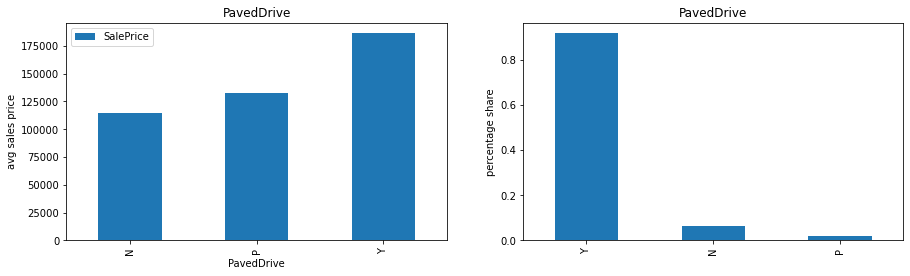

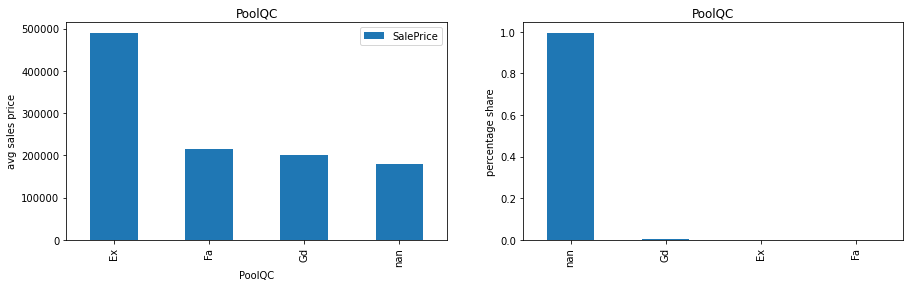

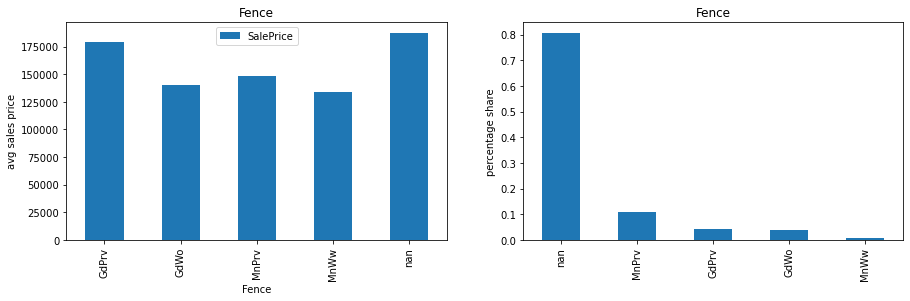

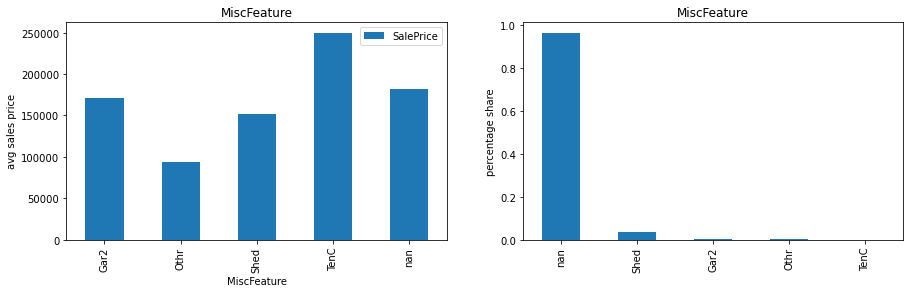

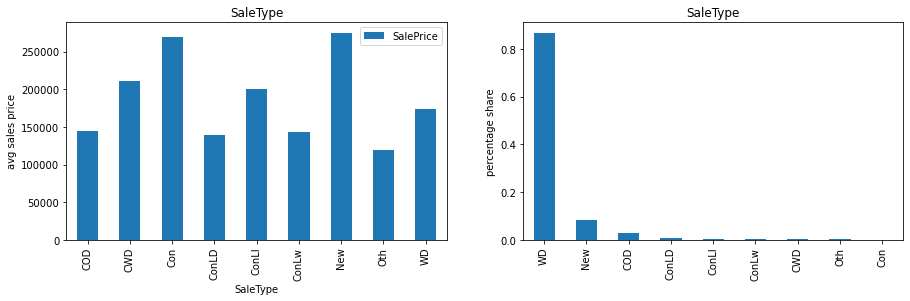

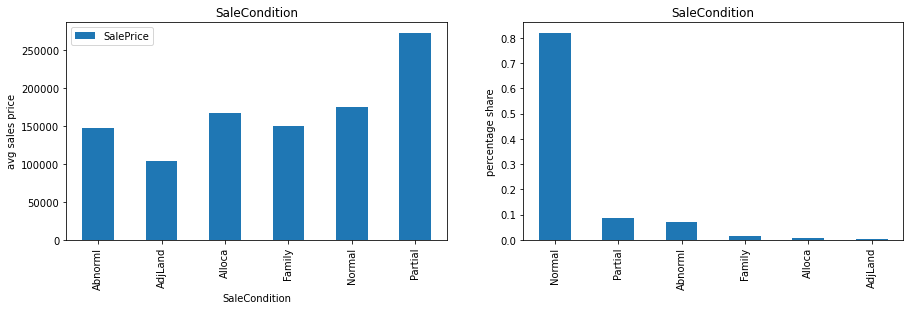

In [13]:
for var in cat_vars:
    analyse_cat(df , var)

**1.4 Things that needs to be done**
* handle nan
* filter ordinal and nominal data 
* convert nominal to some kind of ordinal or look for one hot incoding
* alot of variable occure extreme rarely group them togethe

In [14]:
def analyse_Num(df, var):
    df[var].plot(kind = 'hist' , title = var)
    plt.show()

### Handling Missing Values 

In [15]:
# Categorical Values
df[cat_vars_nan].isnull().mean().sort_values(ascending = False)

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
GarageType      0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
BsmtExposure    0.026027
BsmtFinType2    0.026027
BsmtQual        0.025342
BsmtCond        0.025342
BsmtFinType1    0.025342
MasVnrType      0.005479
Electrical      0.000685
dtype: float64

In [16]:
temp = cat_vars_nan.copy()
temp.append(target)
df_cat_nan = df[temp]

In [17]:
cat_vars_nan

['Alley',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

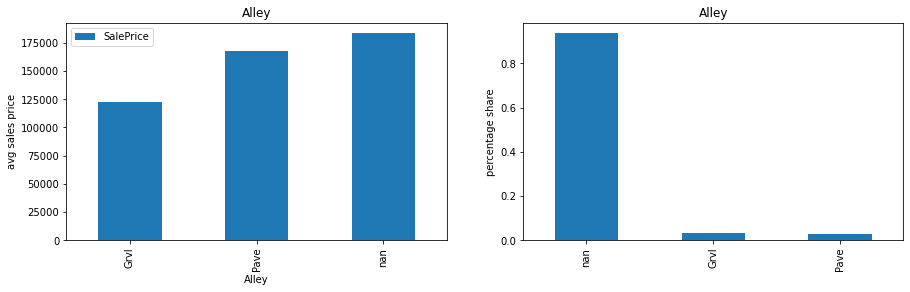

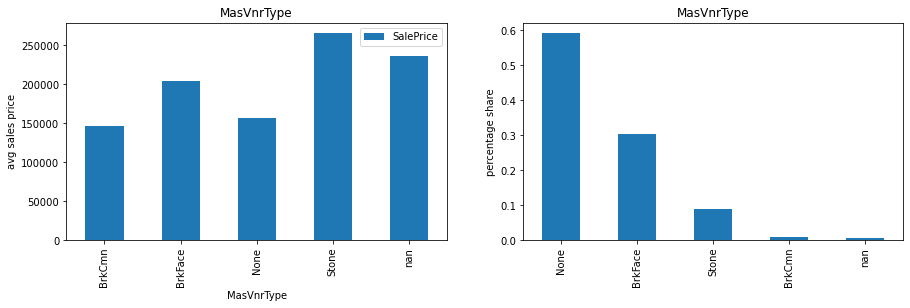

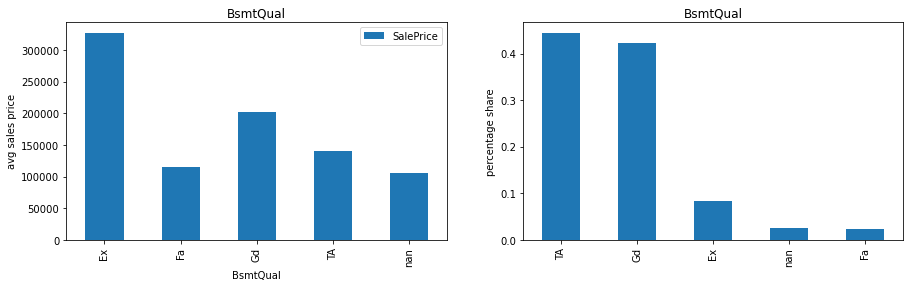

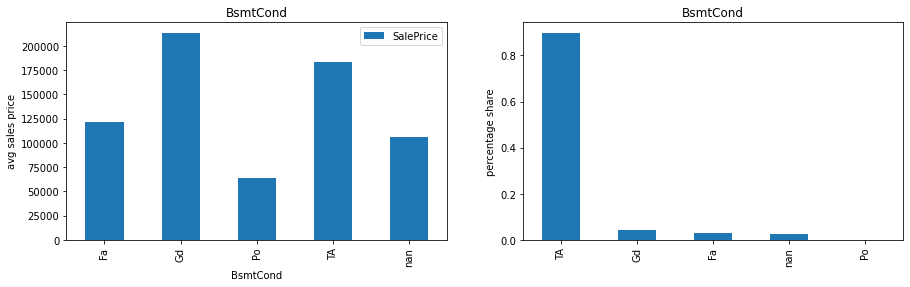

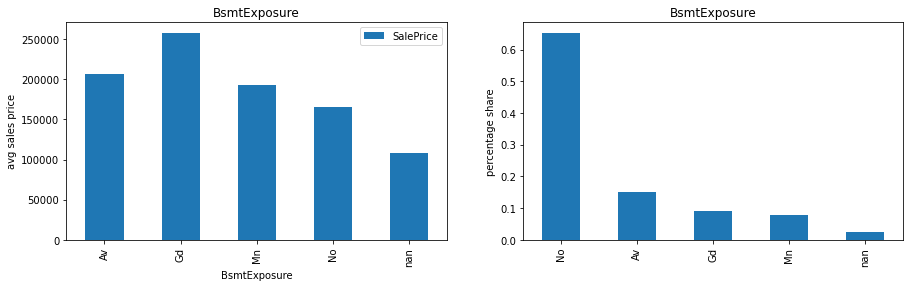

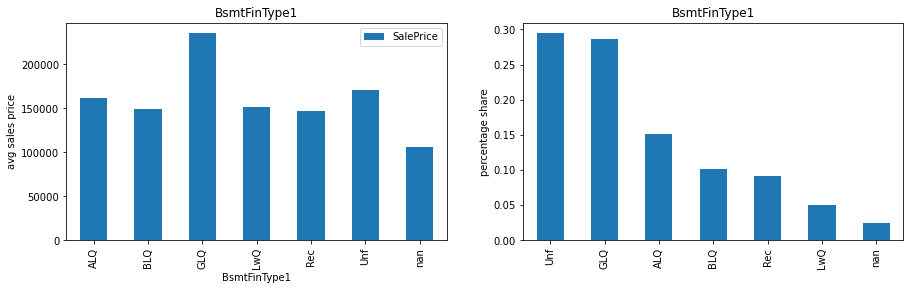

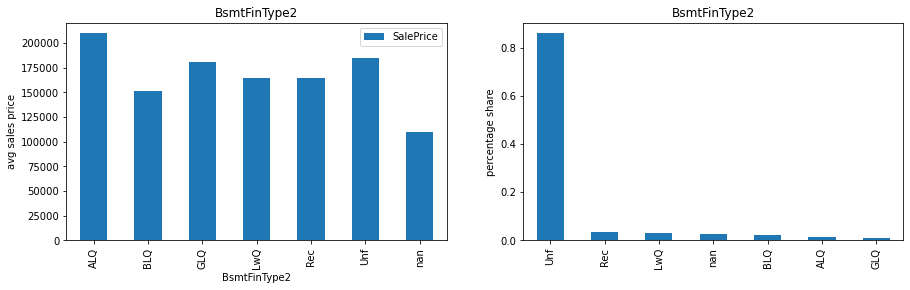

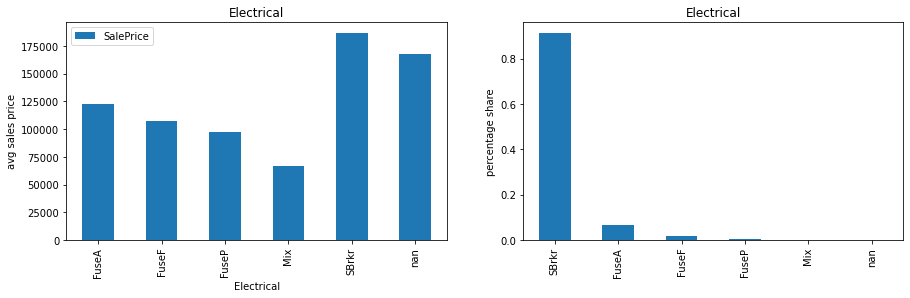

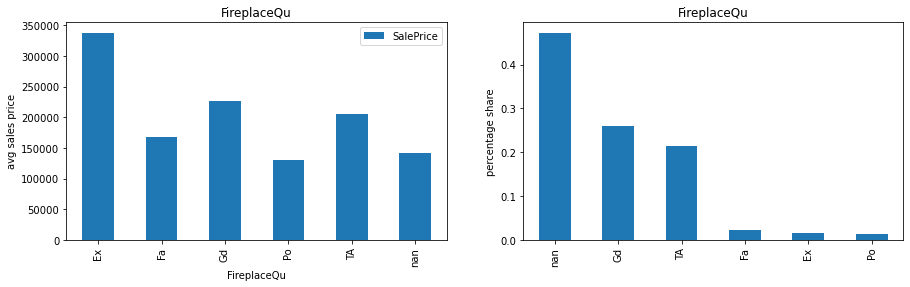

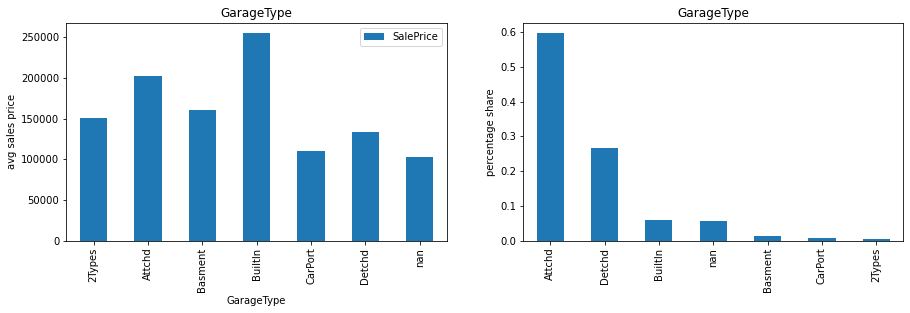

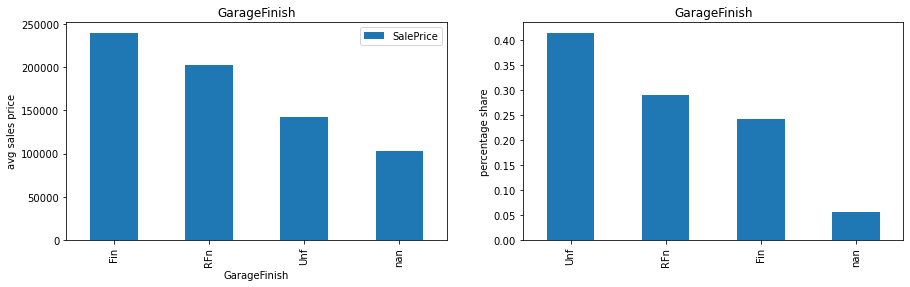

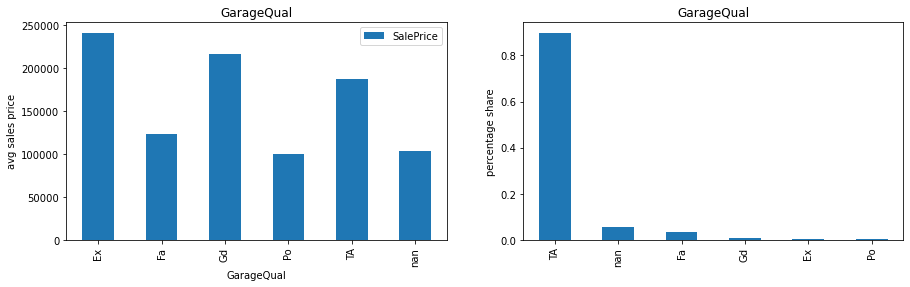

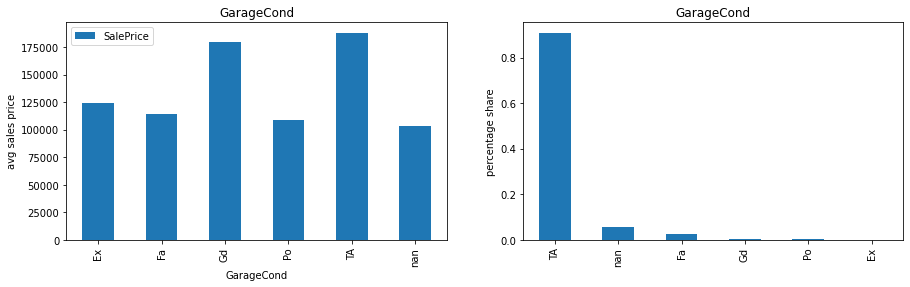

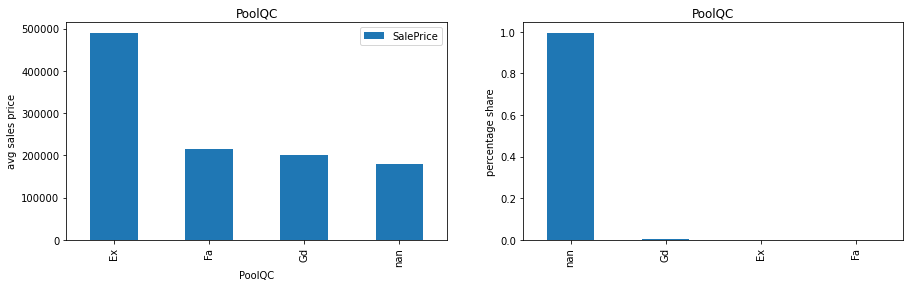

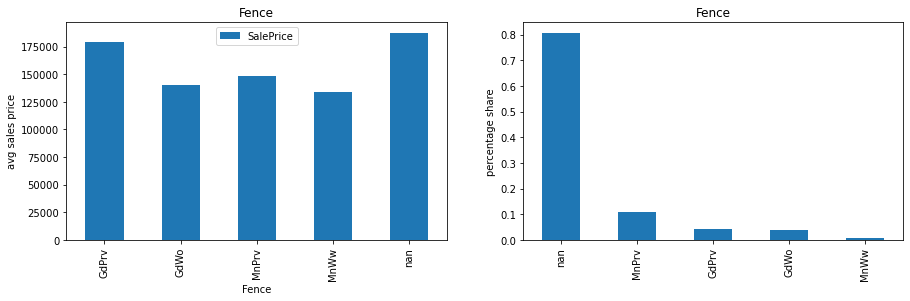

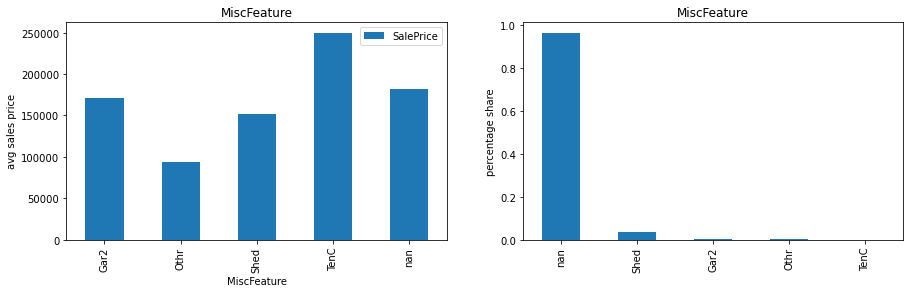

In [18]:
for var in cat_vars_nan:
    analyse_cat(df_cat_nan, var)

In [19]:
df[cat_vars_nan].isnull().sum().sort_values(ascending = False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrType         8
Electrical         1
dtype: int64

In [20]:
df[cat_vars_nan].isnull().mean().sort_values(ascending = False)

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
GarageType      0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
BsmtExposure    0.026027
BsmtFinType2    0.026027
BsmtQual        0.025342
BsmtCond        0.025342
BsmtFinType1    0.025342
MasVnrType      0.005479
Electrical      0.000685
dtype: float64

**1.5 let's decide column by colum treatment for missing values**

* Alley
 93.76 % homes does not have alley we can say the the homes which do not have alley tends to have higher price this might be homes are separete and there is no need of alley
*we can impute Alley nan to NA - Not applicable and keep separate column*

* ManVnrTyp
There are only 8 value and nothing can be said about this we will drop these rows

* garage - Garagetype , GarageFinish , GarageCond , BGarageQual 
There 81 rows missing related to garage and all these houses are sold for smaller price we can assume they don't have garage so we will replace all the values with Na - not applicable

* FireplaceQu
 we can assume these home does not have firplcae and replace the value to na

* we will drop other rows as they are less than 2 percent and no conclusion can be formed by simple inspection 

we will drop poolQc , MisccFeature, Fence columns




### 1.6 ordinal variables from categorical columns
* we can see there are smome variable which refer to the quality of house we will convert thoes into ordinal label incoding

In [21]:
df['ExterCond'].unique()

array(['TA', 'Gd', 'Fa', 'Po', 'Ex'], dtype=object)

In [22]:
qual_mappings = {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5, 'Missing': 0, 'NA': 0}

qual_vars = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
             'HeatingQC', 'KitchenQual', 'FireplaceQu',
             'GarageQual', 'GarageCond',
            ]

for var in qual_vars:
    df[var] = df[var].map(qual_mappings)

In [23]:
exposure_mappings = {'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4, 'Missing': 0, 'NA': 0}

var = 'BsmtExposure'

df[var] = df[var].map(exposure_mappings)

In [24]:
finish_mappings = {'Missing': 0, 'NA': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6}

finish_vars = ['BsmtFinType1', 'BsmtFinType2']

for var in finish_vars:
    df[var] = df[var].map(finish_mappings)

In [25]:

garage_mappings = {'Missing': 0, 'NA': 0, 'Unf': 1, 'RFn': 2, 'Fin': 3}

var = 'GarageFinish'

df[var] = df[var].map(garage_mappings)

In [27]:
fence_mappings = {'Missing': 0, 'NA': 0, 'MnWw': 1, 'GdWo': 2, 'MnPrv': 3, 'GdPrv': 4}

var = 'Fence'

df[var] = df[var].map(fence_mappings)


In [28]:

qual_vars  = qual_vars + finish_vars + ['BsmtExposure','GarageFinish','Fence']

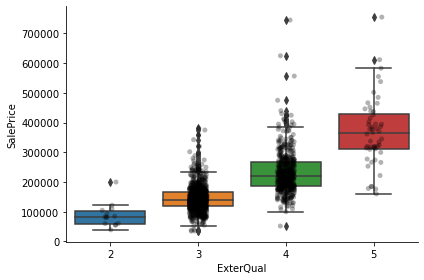

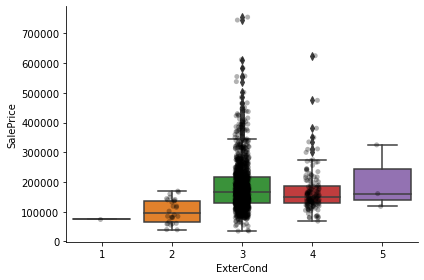

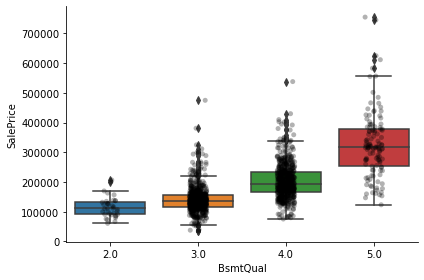

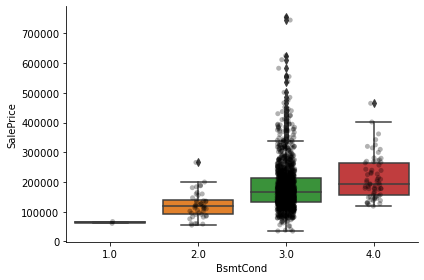

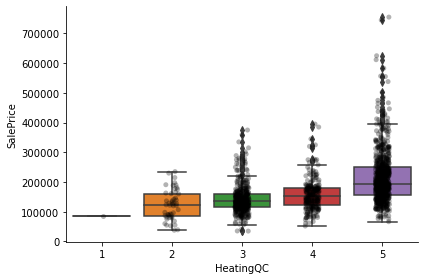

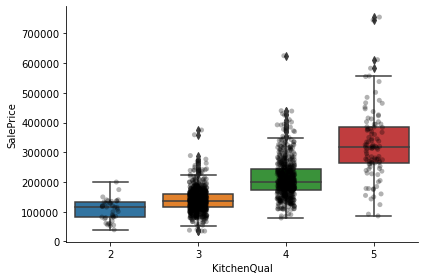

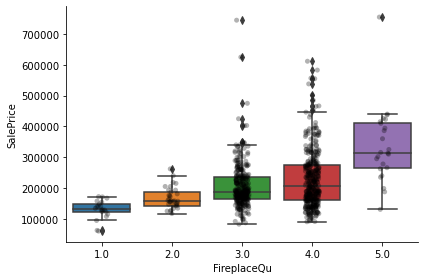

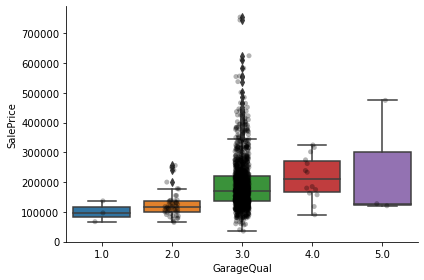

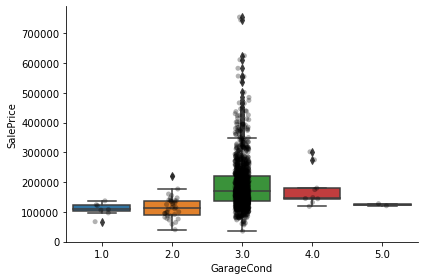

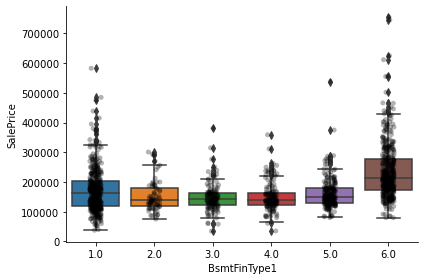

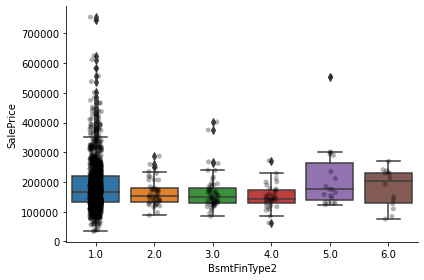

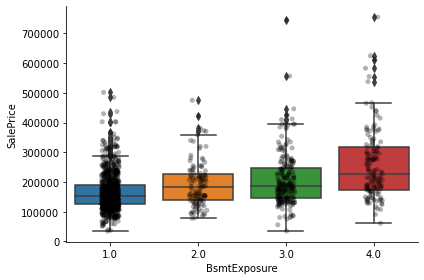

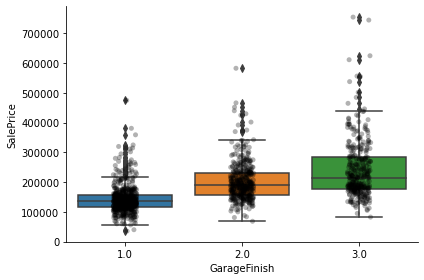

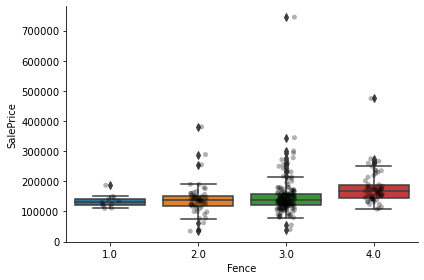

In [29]:

for var in qual_vars:
    # make boxplot with Catplot
    sns.catplot(x=var, y='SalePrice', data=df, kind="box", height=4, aspect=1.5)
    # add data points to boxplot with stripplot
    sns.stripplot(x=var, y='SalePrice', data=df, jitter=0.1, alpha=0.3, color='k')
    plt.show()

We can see pattern in ordinal data as the values are increasing the price also goes up

**1.6 We need to map the remain variable**
* first we need to group rare value
* and then label encode the data 

In [30]:
# capture the remaining categorical variables
# (those that we did not re-map)

cat_others = [ var for var in cat_vars if var not in qual_vars]

len(cat_others)

29

In [31]:
def analyse_rare_labels(df, var, rare_perc):
    df = df.copy()

    # determine the % of observations per category
    tmp = df.groupby(var)['SalePrice'].count() / len(df)

    # return categories that are rare
    return tmp[tmp < rare_perc]

# print categories that are present in less than
# 1 % of the observations

for var in cat_others:
    print(analyse_rare_labels(df, var, 0.01))
    print()

MSZoning
C (all)    0.006849
Name: SalePrice, dtype: float64

Street
Grvl    0.00411
Name: SalePrice, dtype: float64

Series([], Name: SalePrice, dtype: float64)

LotShape
IR3    0.006849
Name: SalePrice, dtype: float64

Series([], Name: SalePrice, dtype: float64)

Utilities
NoSeWa    0.000685
Name: SalePrice, dtype: float64

LotConfig
FR3    0.00274
Name: SalePrice, dtype: float64

LandSlope
Sev    0.008904
Name: SalePrice, dtype: float64

Neighborhood
Blueste    0.001370
NPkVill    0.006164
Veenker    0.007534
Name: SalePrice, dtype: float64

Condition1
PosA    0.005479
RRAe    0.007534
RRNe    0.001370
RRNn    0.003425
Name: SalePrice, dtype: float64

Condition2
Artery    0.001370
Feedr     0.004110
PosA      0.000685
PosN      0.001370
RRAe      0.000685
RRAn      0.000685
RRNn      0.001370
Name: SalePrice, dtype: float64

Series([], Name: SalePrice, dtype: float64)

HouseStyle
1.5Unf    0.009589
2.5Fin    0.005479
2.5Unf    0.007534
Name: SalePrice, dtype: float64

RoofStyle
Flat

### 2.0 NUMERICAL COLUMNS

In [32]:
num_vars

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

**2.1 Ther are three types of variable**
* year (Time)
* dicreate
* continuous

In [33]:
num_vars_nan

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [34]:
year_vars = [var for var in num_vars if 'Yr' in var or 'Year' in var]
discrete_vars = [var for var in num_vars if len(df[var].unique()) < 20 and var not in year_vars]
cont_vars = [var for var in num_vars if var not in discrete_vars+year_vars]

In [35]:
temp = year_vars.copy()
temp.append(target)
df_year = df[temp]

In [36]:
temp

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold', 'SalePrice']

In [37]:
df_year['age_build'] = df_year.YrSold- df_year.YearBuilt
df_year['age_garage'] = df_year.YrSold - df_year.GarageYrBlt
df_year['age_remod'] = df_year.YrSold - df_year.YearRemodAdd

C:\Users\sande\AppData\Local\Temp\ipykernel_5888\2452356172.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year['age_build'] = df_year.YrSold- df_year.YearBuilt
C:\Users\sande\AppData\Local\Temp\ipykernel_5888\2452356172.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year['age_garage'] = df_year.YrSold - df_year.GarageYrBlt
C:\Users\sande\AppData\Local\Temp\ipykernel_5888\2452356172.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

In [38]:
df_year.head()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold,SalePrice,age_build,age_garage,age_remod
0,2003,2003,2003.0,2008,208500,5,5.0,5
1,1976,1976,1976.0,2007,181500,31,31.0,31
2,2001,2002,2001.0,2008,223500,7,7.0,6
3,1915,1970,1998.0,2006,140000,91,8.0,36
4,2000,2000,2000.0,2008,250000,8,8.0,8


In [39]:
age_c = [var for var in df_year.columns if 'age_' in var]

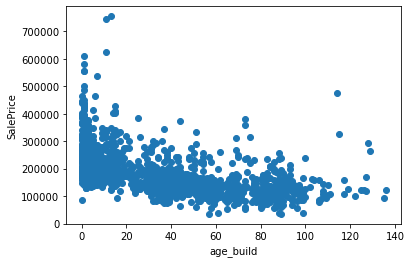

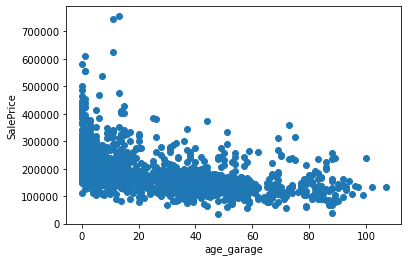

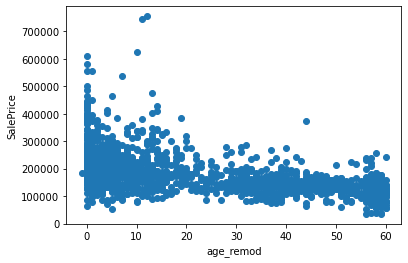

In [40]:
for var in age_c:
    plt.scatter(df_year[var], df_year[target] )
    plt.xlabel(var)
    plt.ylabel(target)
    plt.show()

In [41]:
# we can see here as the age increase the selling price goes down

In remaining columns we have some variable as continuous and some as discreate we will anylyse themm separetly


### 2.2 Discreate variable

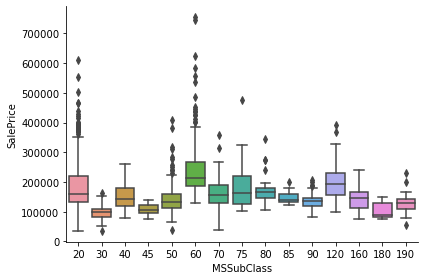

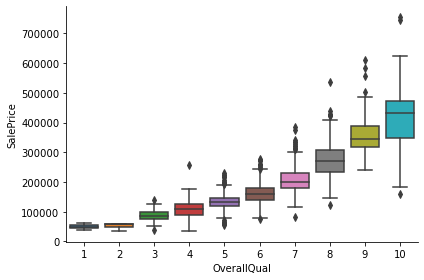

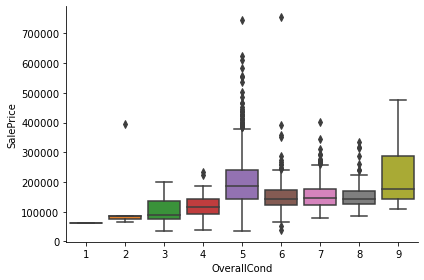

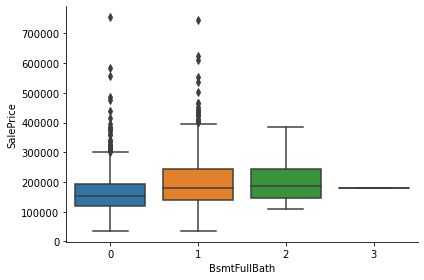

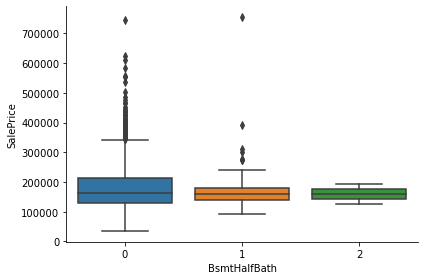

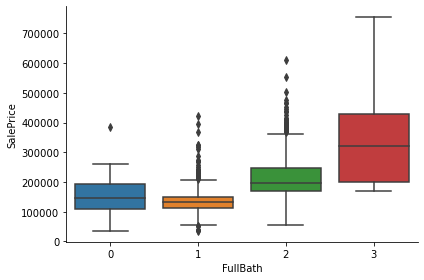

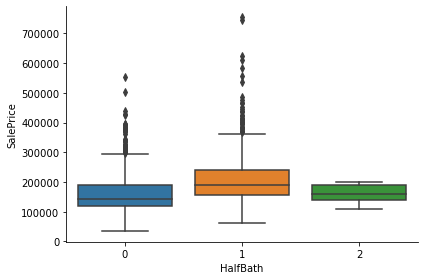

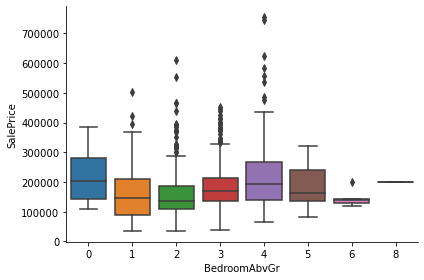

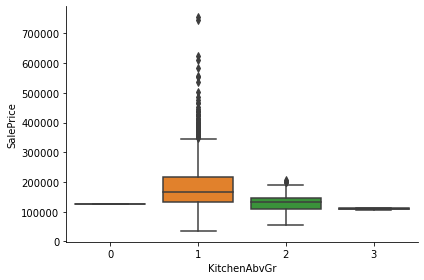

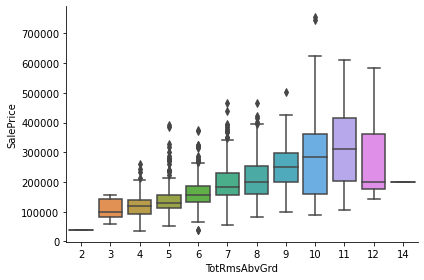

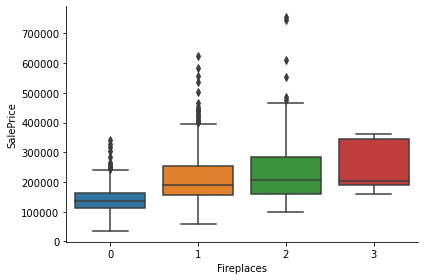

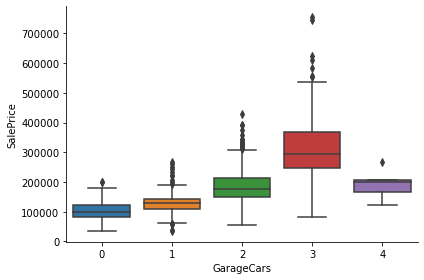

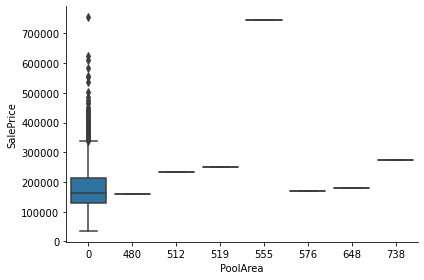

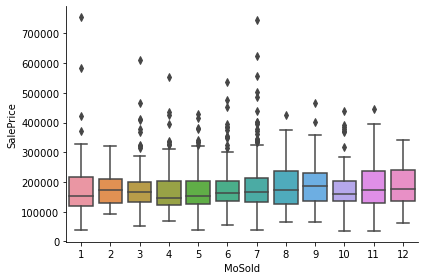

In [42]:
for var in discrete_vars:
        sns.catplot(x=var, y='SalePrice', data=df, kind="box", height=4, aspect=1.5)


Some of the column do have linear relation ship with the selling price but some of these don't we wi;; use feature selection tools to rule out these there is not need of further preocessing

### 2.3 Continuous variables

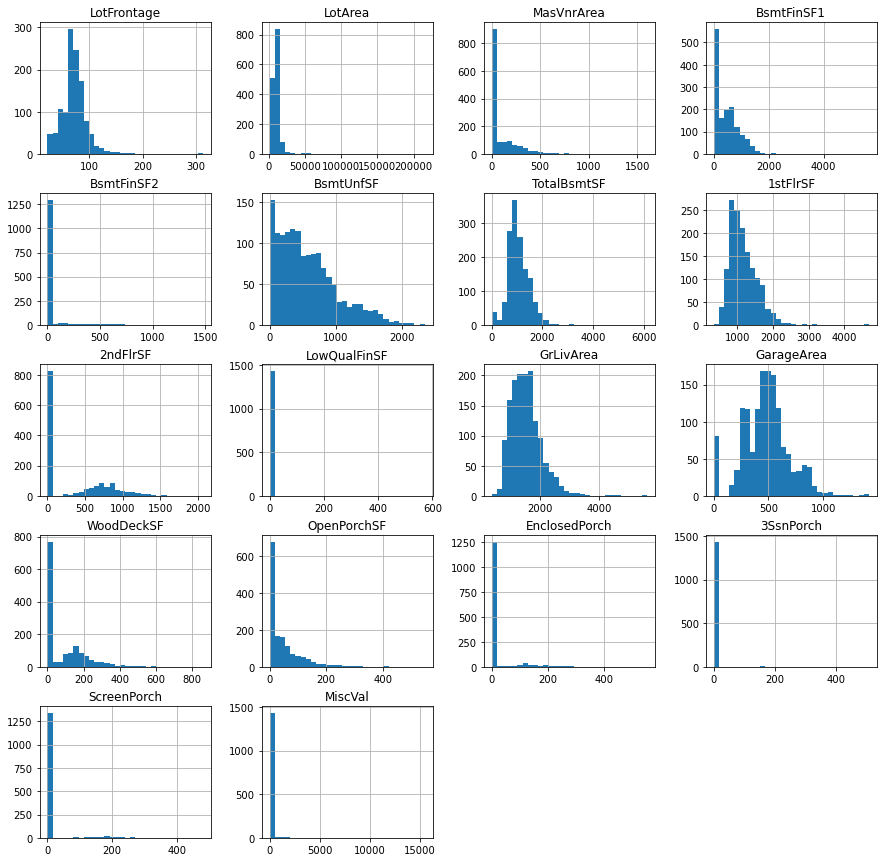

In [43]:
df[cont_vars].hist(bins=30, figsize=(15,15))
plt.show()

In [44]:
# few o the variable are extreamly skewed we will simply convert them into binary class
skewed = ['BsmtFinSF2', 'LowQualFinSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal']


cont_vars = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 
            'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea','WoodDeckSF',
            'OpenPorchSF',]

In [45]:
import scipy.stats as stats

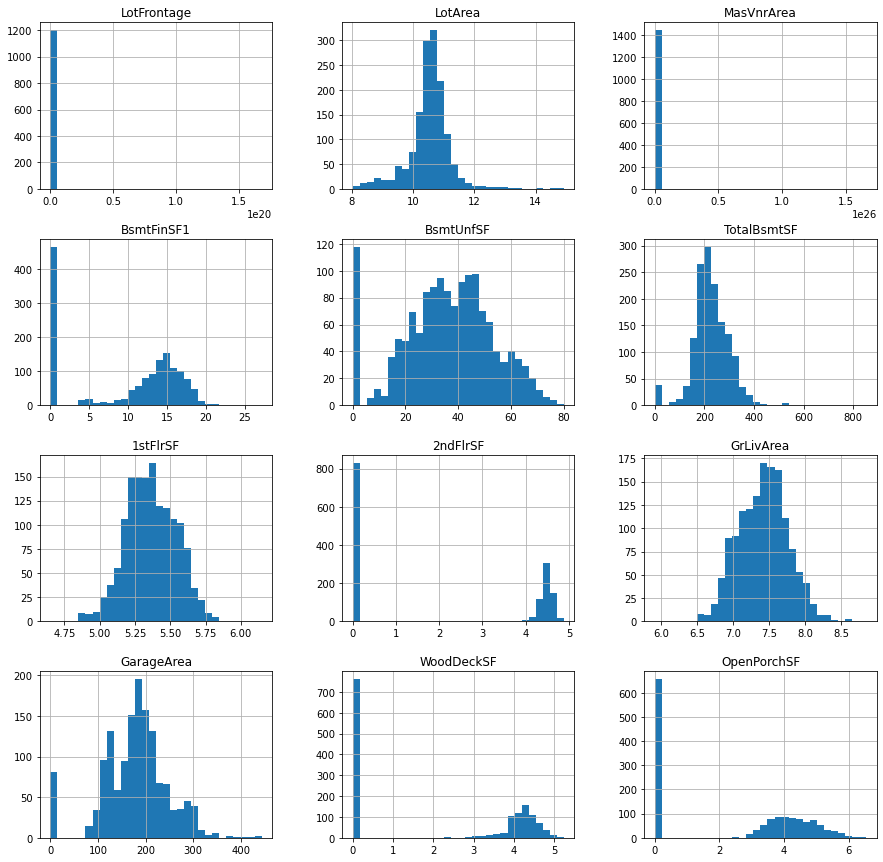

In [46]:
tmp = df.copy()

for var in cont_vars:

    # transform the variable - yeo-johsnon
    tmp[var], param = stats.yeojohnson(df[var])

    
# plot the histograms of the transformed variables
tmp[cont_vars].hist(bins=30, figsize=(15,15))
plt.show()

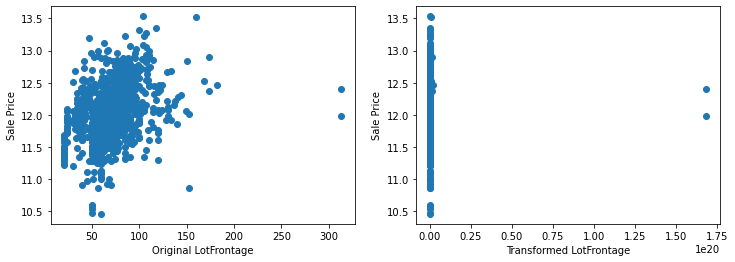

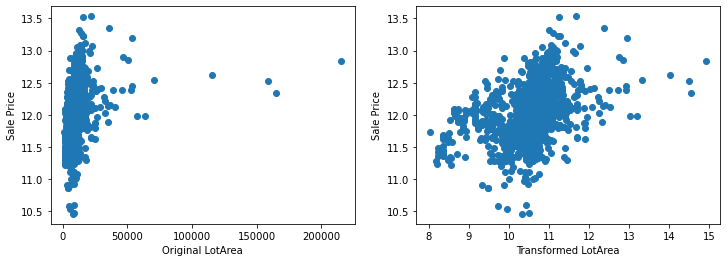

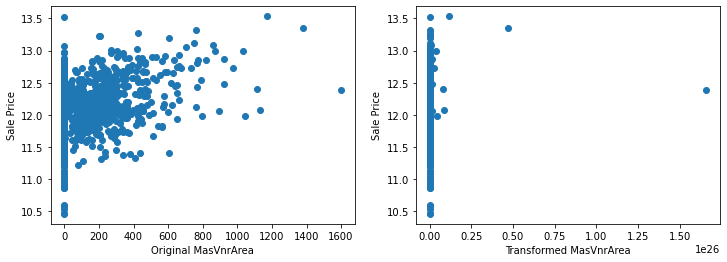

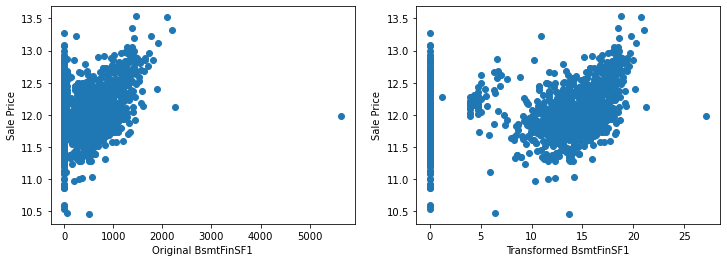

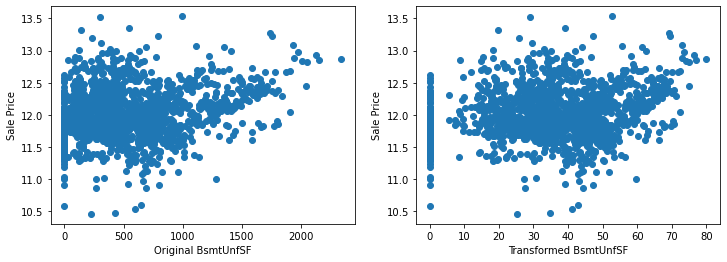

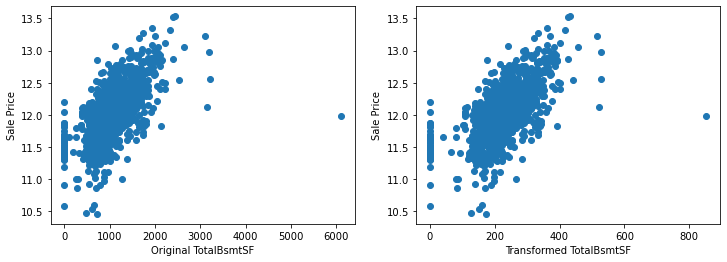

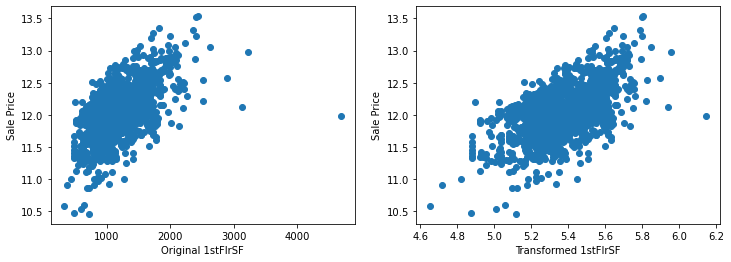

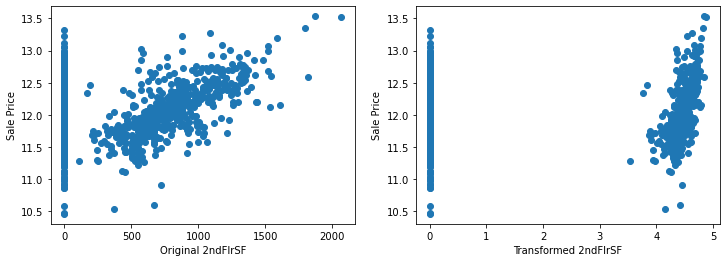

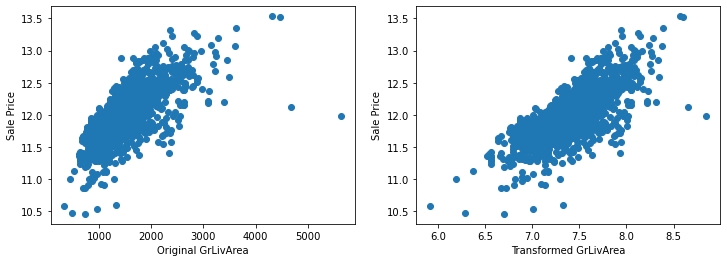

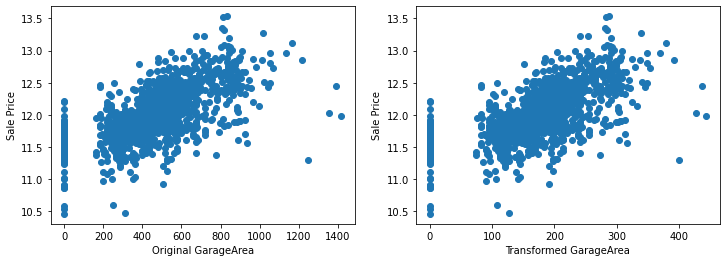

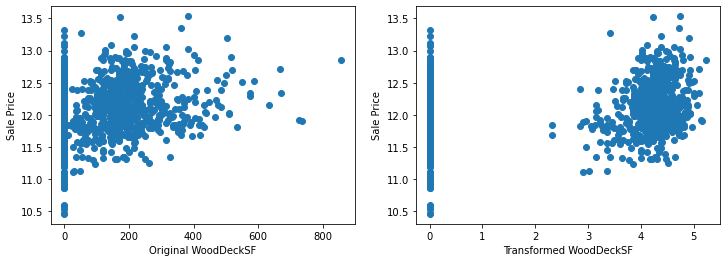

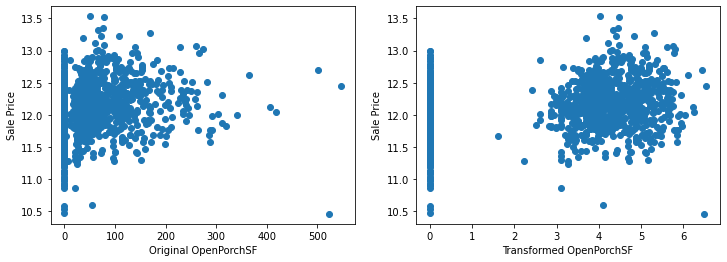

In [47]:
# let's plot the original or transformed variables
# vs sale price, and see if there is a relationship

for var in cont_vars:
    
    plt.figure(figsize=(12,4))
    
    # plot the original variable vs sale price    
    plt.subplot(1, 2, 1)
    plt.scatter(df[var], np.log(df['SalePrice']))
    plt.ylabel('Sale Price')
    plt.xlabel('Original ' + var)

    # plot transformed variable vs sale price
    plt.subplot(1, 2, 2)
    plt.scatter(tmp[var], np.log(tmp['SalePrice']))
    plt.ylabel('Sale Price')
    plt.xlabel('Transformed ' + var)
                
    plt.show()

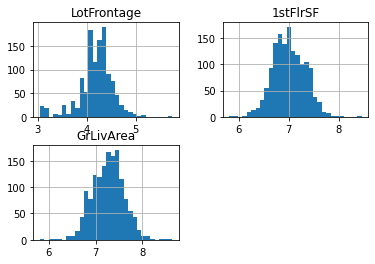

In [48]:
# Let's go ahead and analyse the distributions of these variables
# after applying a logarithmic transformation

tmp = df.copy()

for var in ["LotFrontage", "1stFlrSF", "GrLivArea"]:

    # transform the variable with logarithm
    tmp[var] = np.log(df[var])
    
tmp[["LotFrontage", "1stFlrSF", "GrLivArea"]].hist(bins=30)
plt.show()

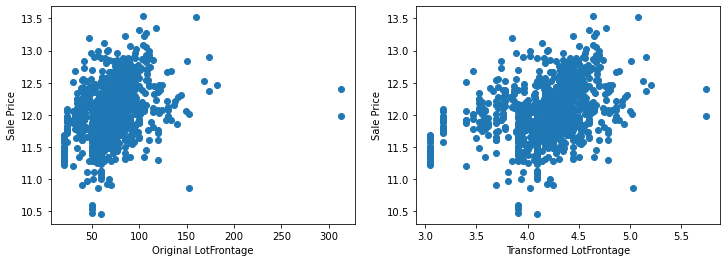

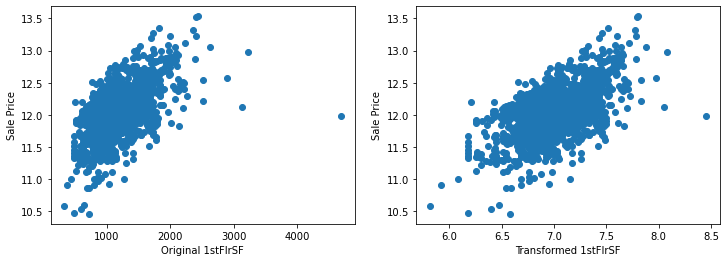

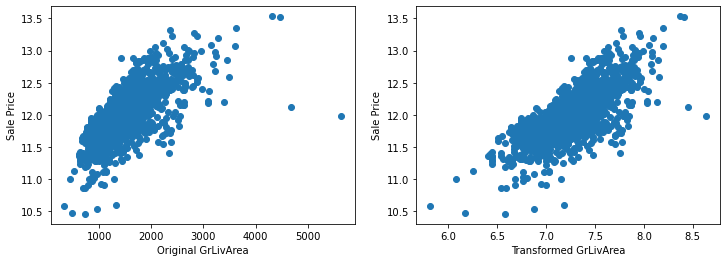

In [49]:
# let's plot the original or transformed variables
# vs sale price, and see if there is a relationship

for var in ["LotFrontage", "1stFlrSF", "GrLivArea"]:
    
    plt.figure(figsize=(12,4))
    
    # plot the original variable vs sale price    
    plt.subplot(1, 2, 1)
    plt.scatter(df[var], np.log(df['SalePrice']))
    plt.ylabel('Sale Price')
    plt.xlabel('Original ' + var)

    # plot transformed variable vs sale price
    plt.subplot(1, 2, 2)
    plt.scatter(tmp[var], np.log(tmp['SalePrice']))
    plt.ylabel('Sale Price')
    plt.xlabel('Transformed ' + var)
                
    plt.show()

### Extreamly Skewed data

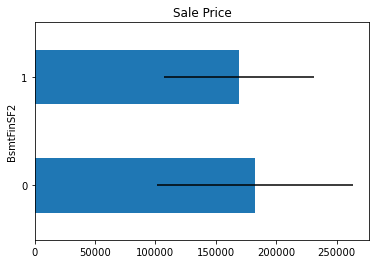

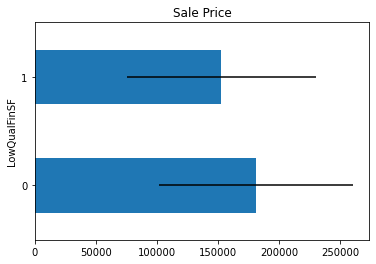

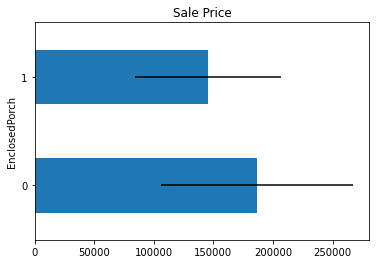

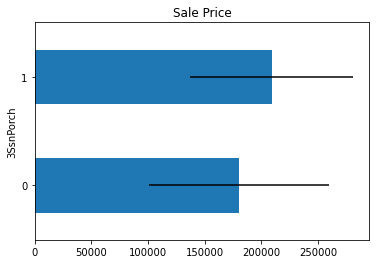

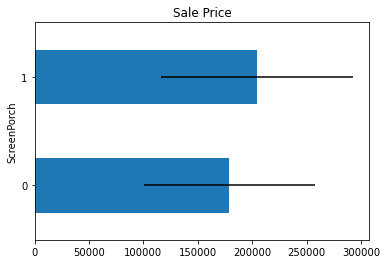

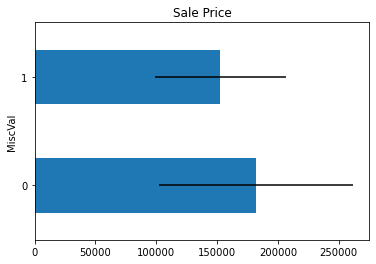

In [50]:
for var in skewed:
    
    tmp = df.copy()
    
    # map the variable values into 0 and 1
    tmp[var] = np.where(df[var]==0, 0, 1)
    
    # determine mean sale price in the mapped values
    tmp = tmp.groupby(var)['SalePrice'].agg(['mean', 'std'])

    # plot into a bar graph
    tmp.plot(kind="barh", y="mean", legend=False,
             xerr="std", title="Sale Price")

    plt.show()

In [ ]:
# there are too many variable we will use generic tranormation using above data